# House Price Prediction Using Linear Regression

In [ ]:
import numpy as np
import pandas as pd

In [5]:
data =pd.read_csv("C:\\Users\\reddy\\OneDrive\\Documents\\Bengaluru_House_Data.csv")

In [6]:
data

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [9]:
data.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [12]:
data=data.drop(['area_type','availability','balcony','society'],axis=1)


In [13]:
data

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00
...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00
13316,Richards Town,4 BHK,3600,5.0,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00


In [14]:
data.isna()

,location,size,total_sqft,bath,price
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
13315,False,False,False,False,False
13316,False,False,False,False,False
13317,False,False,False,False,False
13318,False,False,False,False,False


In [15]:
data.isna().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [16]:
for column in data.columns:
    if data[column].dtype == 'O':  
        data[column].fillna(data[column].mode()[0], inplace=True)
    else:
        data[column].fillna(data[column].median(), inplace=True)

In [17]:
data.shape

(13320, 5)

In [18]:
data['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [19]:
data['BHK']=data['size'].apply(lambda x: int(x.split(' ')[0]))

In [20]:
data['BHK']

0        2
1        4
2        3
3        3
4        2
        ..
13315    5
13316    4
13317    2
13318    4
13319    1
Name: BHK, Length: 13320, dtype: int64

In [21]:
data.head

<bound method NDFrame.head of                        location       size total_sqft  bath   price  BHK
0      Electronic City Phase II      2 BHK       1056   2.0   39.07    2
1              Chikka Tirupathi  4 Bedroom       2600   5.0  120.00    4
2                   Uttarahalli      3 BHK       1440   2.0   62.00    3
3            Lingadheeranahalli      3 BHK       1521   3.0   95.00    3
4                      Kothanur      2 BHK       1200   2.0   51.00    2
...                         ...        ...        ...   ...     ...  ...
13315                Whitefield  5 Bedroom       3453   4.0  231.00    5
13316             Richards Town      4 BHK       3600   5.0  400.00    4
13317     Raja Rajeshwari Nagar      2 BHK       1141   2.0   60.00    2
13318           Padmanabhanagar      4 BHK       4689   4.0  488.00    4
13319              Doddathoguru      1 BHK        550   1.0   17.00    1

[13320 rows x 6 columns]>

In [22]:
data['BHK'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [23]:
data[data.BHK>20]

,location,size,total_sqft,bath,price,BHK
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [24]:
data.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [25]:
def isfloat(x):
    try:
        float(x)
    except:
        return False
    return True

In [26]:
data[~data['total_sqft'].apply(isfloat)].head(10)

,location,size,total_sqft,bath,price,BHK
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
56,Devanahalli,4 Bedroom,3010 - 3410,2.0,192.000,4
81,Hennur Road,4 Bedroom,2957 - 3450,2.0,224.500,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
224,Devanahalli,3 BHK,1520 - 1740,2.0,74.820,3
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2


In [27]:
def convert_sqft_tonum(x):
    token=x.split('-')
    if len(token)==2:
        return (float(token[0])+float(token[1]))/2
    try:
        return float(x)
    except:
        return None

In [28]:
data=data.copy()
data['total_sqft']=data['total_sqft'].apply(convert_sqft_tonum)

In [29]:
data

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5
13316,Richards Town,4 BHK,3600.0,5.0,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4


In [30]:
data.head(10)

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
5,Whitefield,2 BHK,1170.0,2.0,38.00,2
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3
9,Gandhi Bazar,6 Bedroom,1020.0,6.0,370.00,6


In [31]:
data.loc[30]

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
price             186.0
BHK                   4
Name: 30, dtype: object

In [32]:
data1=data.copy()
data1['price_per_sqft']=data1['price']*1000000/data1['total_sqft']
data1.head()

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,36998.106061
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,46153.846154
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,43055.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,62458.908613
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,42500.000000


In [33]:
len(data1.location.unique())

1305

In [34]:
data1.location=data1.location.apply(lambda x: x.strip())
location_stats=data1.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Whitefield               542
Sarjapur  Road           399
Electronic City          304
Kanakpura Road           273
Thanisandra              237
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1294, dtype: int64

In [35]:
len(location_stats[location_stats<=10])

1053

In [36]:
locationlessthan10=location_stats[location_stats<=10]
locationlessthan10

location
Sadashiva Nagar          10
Nagappa Reddy Layout     10
Nagadevanahalli          10
Dodsworth Layout         10
1st Block Koramangala    10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Karnataka Shabarimala     1
whitefiled                1
Name: location, Length: 1053, dtype: int64

In [37]:
len(data1.location.unique())

1294

In [38]:
data1.location=data1.location.apply(lambda x: 'other' if x in locationlessthan10 else x)
len(data1.location.unique())

242

In [39]:
data1.head(10)

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,36998.106061
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,46153.846154
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,43055.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,62458.908613
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,42500.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,32478.632479
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,74670.571010
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,181818.181818
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,48282.442748
9,other,6 Bedroom,1020.0,6.0,370.00,6,362745.098039


In [40]:
data1[data1.total_sqft/data1.BHK<300].head()

,location,size,total_sqft,bath,price,BHK,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,362745.098039
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,333333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,106609.808102
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,62962.962963
70,other,3 Bedroom,500.0,3.0,100.0,3,200000.000000


In [41]:
data2=data1[~(data1.total_sqft/data1.BHK<300)]
data2.head(10)

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,36998.106061
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,46153.846154
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,43055.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,62458.908613
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,42500.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,32478.632479
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,74670.571010
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,181818.181818
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,48282.442748
10,Whitefield,3 BHK,1800.0,2.0,70.00,3,38888.888889


In [42]:
data2.shape


(12576, 7)

In [43]:
data2["price_per_sqft"].describe().apply(lambda x:format(x,'f'))

count      12530.000000
mean       63039.793575
std        41622.379805
min         2678.298133
25%        42105.263158
50%        52941.176471
75%        69166.666667
max      1764705.882353
Name: price_per_sqft, dtype: object

In [44]:
def remove_pps_outliers(df):
    df_out=pd.DataFrame()
    for key,subdf in df.groupby('location'):
        m=np.mean(subdf.price_per_sqft)
        st=np.std(subdf.price_per_sqft)
        reduced_df=subdf[(subdf.price_per_sqft>(m-st))& (subdf.price_per_sqft<(m+st))]
        df_out=pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
data3=remove_pps_outliers(data2)
data3.shape

(10301, 7)

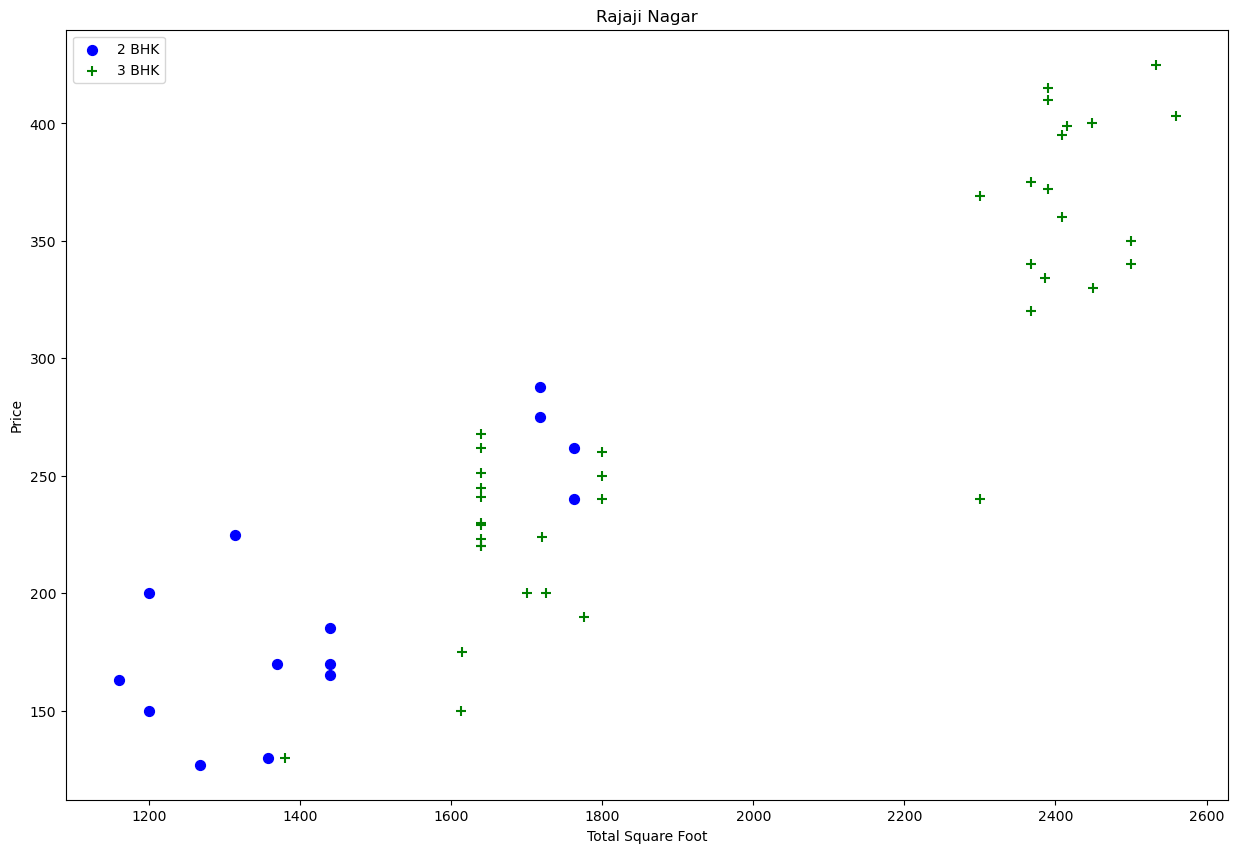

In [45]:
import matplotlib.pyplot as plt
def plot_scatter_chart(df,location):
    bhk2=df[(df.location==location)&(df.BHK==2)]
    bhk3=df[(df.location==location)&(df.BHK==3)]
    plt.rcParams['figure.figsize']=(15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='Blue',label='2 BHK',s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,color='green',marker='+',label='3 BHK',s=50)
    plt.xlabel('Total Square Foot')
    plt.ylabel('Price')
    plt.title(location)
    plt.legend()
plot_scatter_chart(data3,"Rajaji Nagar")

In [46]:
def remove_bhk_outliers(df):
    exclude_indices=np.array([])
    for location, location_df in df.groupby('location'):
        bhk_sats={}
        for BHK,BHK_df in location_df.groupby('BHK'):
            bhk_sats[BHK]={
                'mean':np.mean(BHK_df.price_per_sqft),
                'std':np.std(BHK_df.price_per_sqft),
                'count':BHK_df.shape[0]
            }
        for BHK,BHK_df in location_df.groupby('BHK'):
            stats=bhk_sats.get(BHK-1)
            if stats and stats['count']>5:
                exclude_indices=np.append(exclude_indices,BHK_df[BHK_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

data4=remove_bhk_outliers(data3)
data4.shape

(7361, 7)

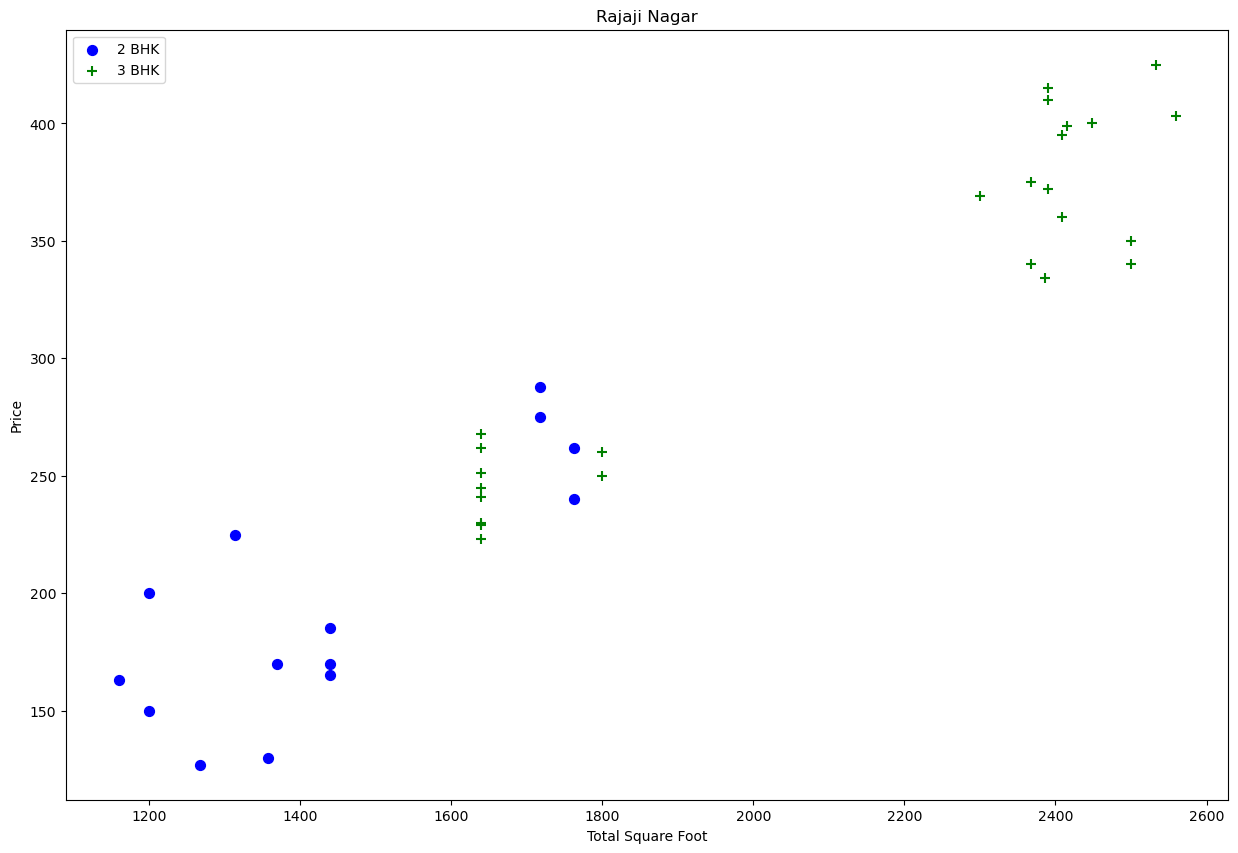

In [47]:
plot_scatter_chart(data4,"Rajaji Nagar")

Text(0, 0.5, 'Count')

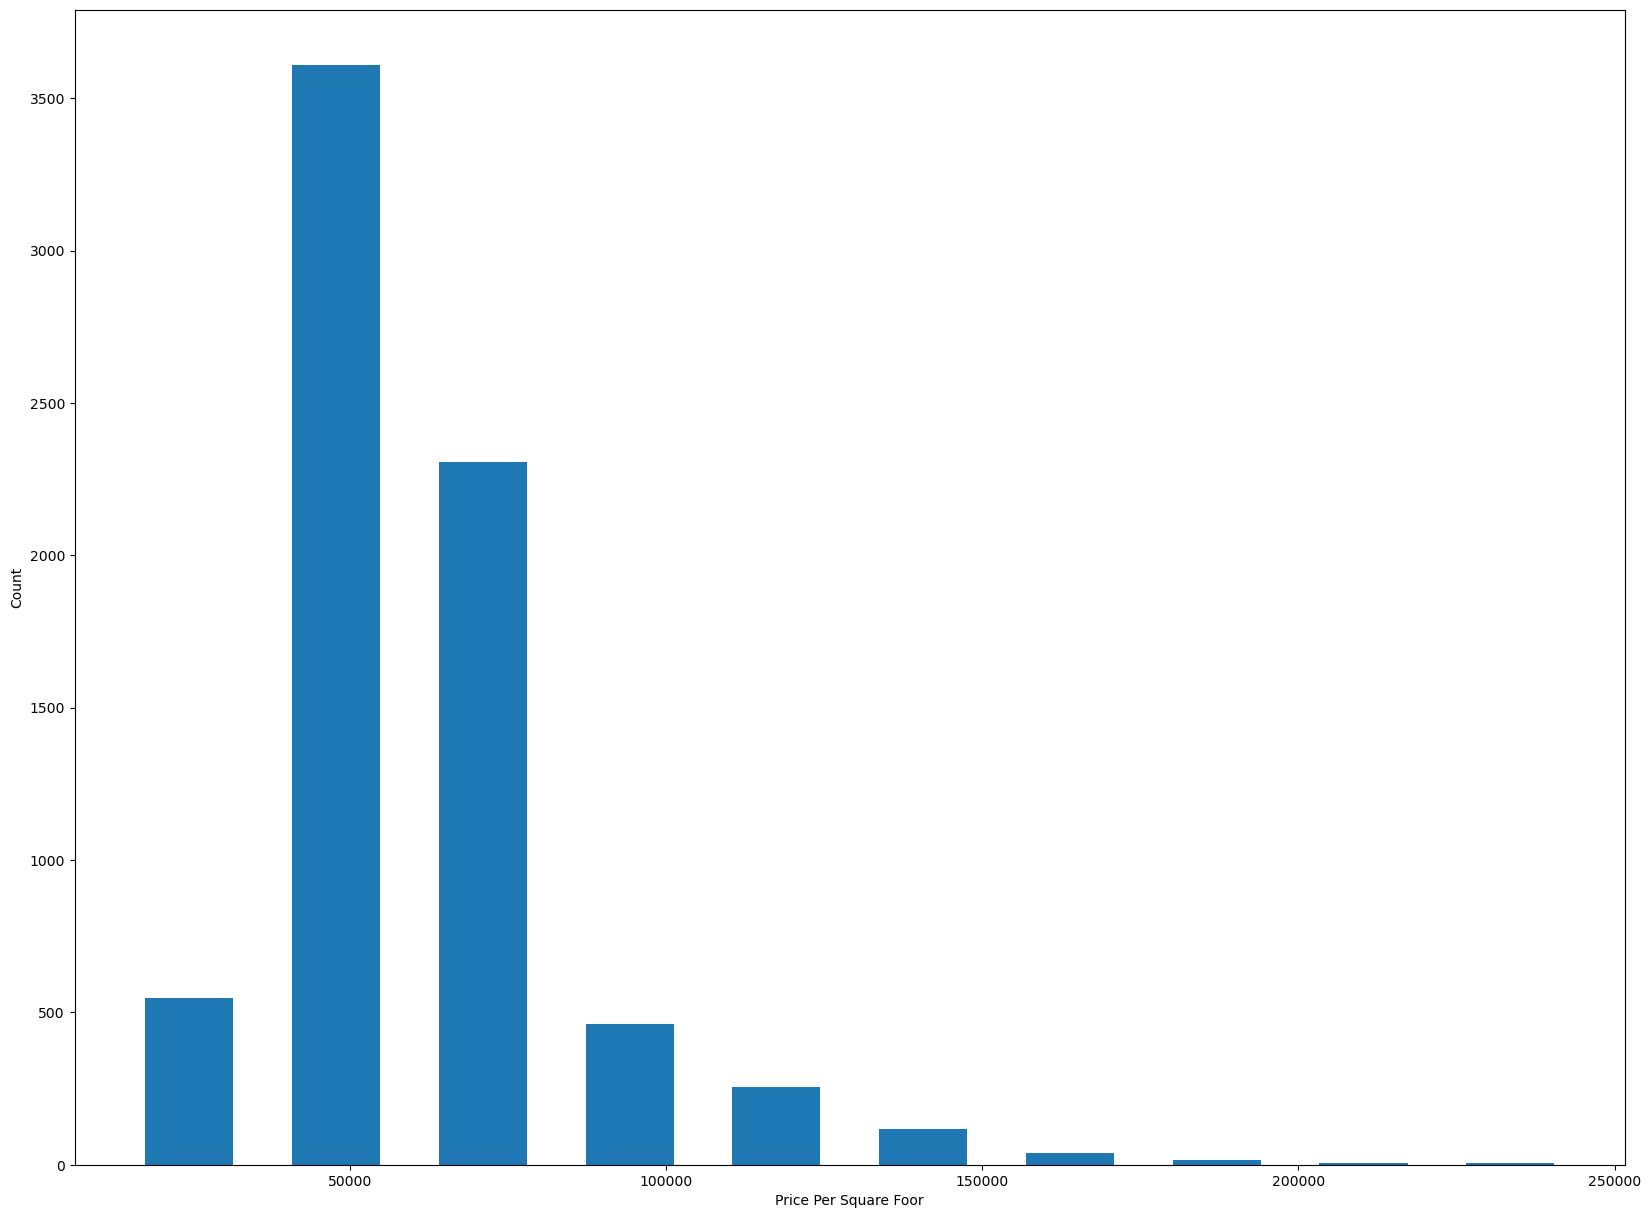

In [48]:
plt.rcParams['figure.figsize']=(20,15)
plt.hist(data4.price_per_sqft,rwidth=0.6)
plt.xlabel("Price Per Square Foor")
plt.ylabel("Count")

In [49]:
data4.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [50]:
data4[data4.bath>10]

,location,size,total_sqft,bath,price,BHK,price_per_sqft
5313,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,40000.00000
8543,other,10 BHK,12000.0,12.0,525.0,10,43750.00000
8632,other,16 BHK,10000.0,16.0,550.0,16,55000.00000
9365,other,11 BHK,6000.0,12.0,150.0,11,25000.00000
9697,other,13 BHK,5425.0,13.0,275.0,13,50691.24424


Text(0, 0.5, 'Count')

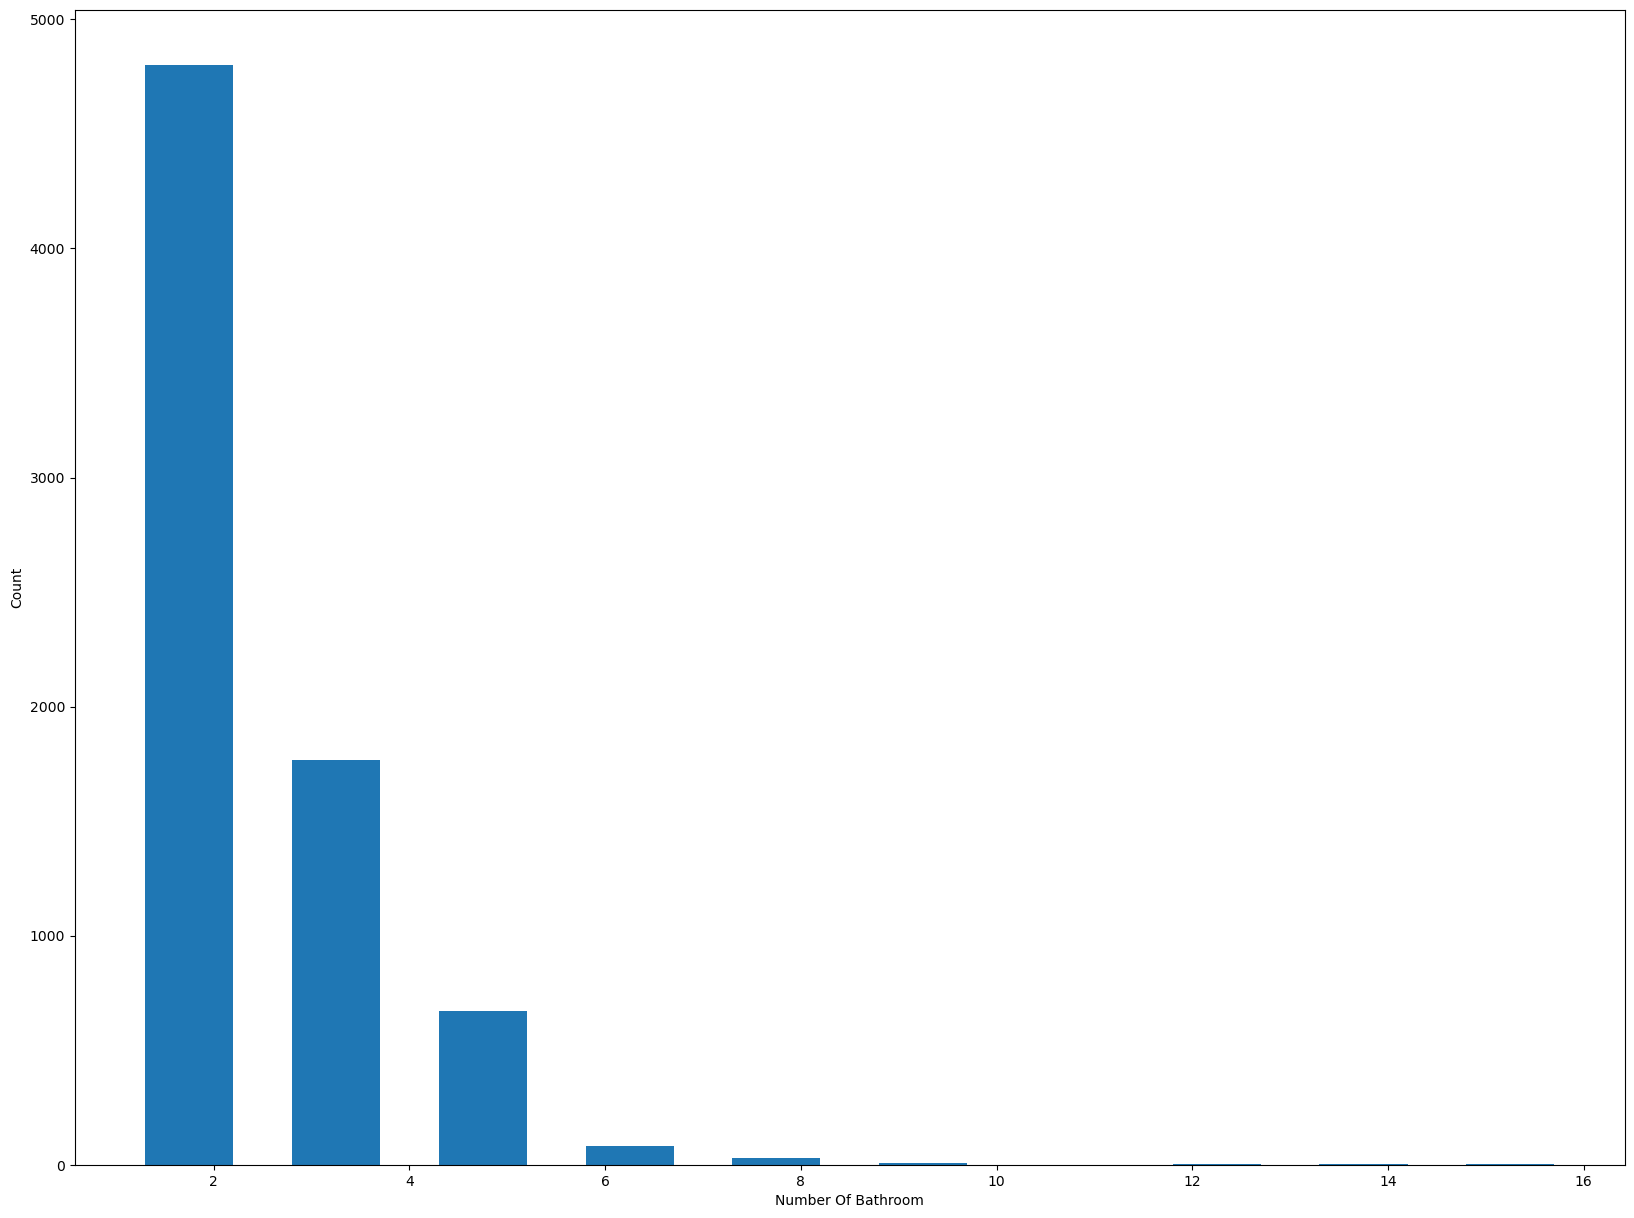

In [51]:
plt.rcParams['figure.figsize']=(20,15)
plt.hist(data4.bath,rwidth=0.6)
plt.xlabel("Number Of Bathroom")
plt.ylabel("Count")

In [52]:
data4[data4.bath>data4.BHK+2]

,location,size,total_sqft,bath,price,BHK,price_per_sqft
1637,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,32520.325203
5274,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,64285.714286
6759,Thanisandra,3 BHK,1806.0,6.0,116.0,3,64230.343300
8468,other,6 BHK,11338.0,9.0,1000.0,6,88198.976892


In [53]:
data5=data4[data4.bath<data4.BHK+2]
data5.shape

(7282, 7)

In [54]:
data6=data5.drop(['size','price_per_sqft'],axis='columns')
data6


,location,total_sqft,bath,price,BHK
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2
...,...,...,...,...,...
10292,other,1200.0,2.0,70.0,2
10293,other,1800.0,1.0,200.0,1
10296,other,1353.0,2.0,110.0,2
10297,other,812.0,1.0,26.0,1


In [55]:
dummies=pd.get_dummies(data6.location)
dummies.head(10)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
data7=pd.concat([data6,dummies.drop('other',axis='columns')],axis='columns')
data7.head()

,location,total_sqft,bath,price,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [57]:
data8=data7.drop('location',axis='columns')
data8.head()

,total_sqft,bath,price,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [58]:
data8.shape

(7282, 245)

In [59]:
X=data8.drop('price',axis='columns')
X.head()

,total_sqft,bath,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
y=data8.price

In [62]:
y

0        428.0
1        194.0
2        235.0
3        130.0
4        148.0
         ...  
10292     70.0
10293    200.0
10296    110.0
10297     26.0
10300    400.0
Name: price, Length: 7282, dtype: float64

In [63]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [64]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.776071885580641